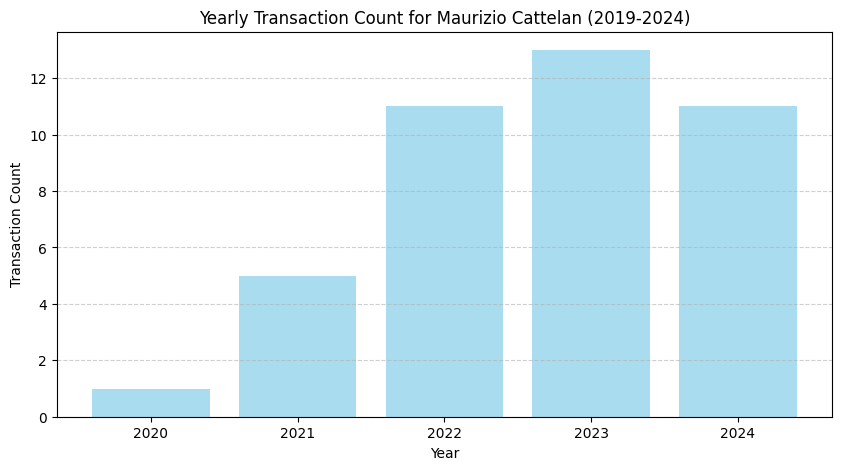

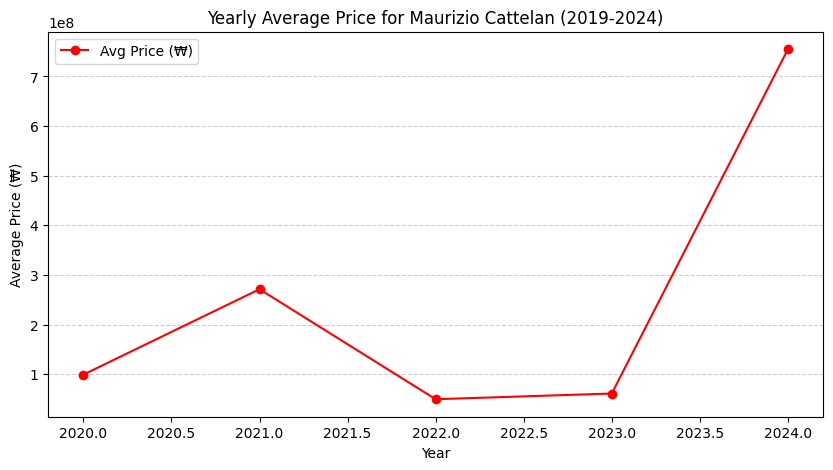

In [2]:
#마우리치오 카텔란

import pandas as pd
import matplotlib.pyplot as plt

# 🔹 최신 데이터 불러오기
file_path = "C:\src\data_python\\auction_data (Maurizio Cattelan).xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# 🔹 날짜 및 가격 컬럼 변환 (KRW 기준)
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["KRW"] = pd.to_numeric(df["KRW"].astype(str).str.replace(",", ""), errors="coerce")

# 🔹 2019년 6월 ~ 2024년 12월 데이터 필터링
start_date = pd.Timestamp("2019-06-01")
end_date = pd.Timestamp("2024-12-31")
df_filtered = df[(df["date"] >= start_date) & (df["date"] <= end_date)]

# 🔹 연도별 거래량 및 평균 가격 계산 (KRW 기준)
yearly_summary = df_filtered.groupby(df_filtered["date"].dt.year).agg(
    transaction_count=('KRW', 'count'),
    avg_price=('KRW', 'mean')
).reset_index()

# 🔹 연도별 변화율 추가 계산
yearly_summary["transaction_count_change (%)"] = yearly_summary["transaction_count"].pct_change() * 100
yearly_summary["avg_price_change (%)"] = yearly_summary["avg_price"].pct_change() * 100

# 🔹 그래프 1: 연도별 거래량 변화
plt.figure(figsize=(10, 5))
plt.bar(yearly_summary["date"], yearly_summary["transaction_count"], color='skyblue', alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Transaction Count")
plt.title("Yearly Transaction Count for Maurizio Cattelan (2019-2024)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 🔹 그래프 2: 연도별 평균 가격 변화
plt.figure(figsize=(10, 5))
plt.plot(yearly_summary["date"], yearly_summary["avg_price"], marker='o', linestyle='-', color='red', label="Avg Price (₩)")
plt.xlabel("Year")
plt.ylabel("Average Price (₩)")
plt.title("Yearly Average Price for Maurizio Cattelan (2019-2024)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
